This file is used to visualize the pickled q data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('mode.chained_assignment', None)
warnings.simplefilter("ignore", category=RuntimeWarning)
import re
import pickle
import struct
from datetime import datetime, timedelta
from os import fsdecode
import pathlib

import matplotlib
import matplotlib.dates as mdates
import matplotlib.gridspec as gs
import matplotlib.pyplot as plt
import numpy as np
import spiceypy as spice
import pandas as pd
import pycwt as wavelet
import scipy.integrate as integrate
import scipy.signal as signal
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
from spiceypy.spiceypy import xf2eul
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math as m

import random
import os
import math


Pull all pickles and store them as one large df...

In [74]:
startOrbitNumber = 6
endOrbitNumber = 54
q_dfs = []
mhd_slopes = []
kinetic_slopes = []
breaks_array = []
gyros_array = []
thetas_array = []
interval = 20


location_dir = 'slope_limits_20min_jsscorrected_psdcorrected'

directory_to_store_q_pickles_parent = '/home/mtfranciscovich/Juno-codes/'+location_dir+'/'+str(interval)+'min_qs_fits_jss_keepcone_nointerp_pickles'
directory_to_store_orbit_qs = directory_to_store_q_pickles_parent+'/orbit_qs'

directory_to_store_q_pickles_extras_indexed = directory_to_store_q_pickles_parent+'/orbit_indexed'

directory_to_store_q_pickles_extras_not_indexed = directory_to_store_q_pickles_parent+'/orbit_not_indexed'


for i in range(startOrbitNumber, endOrbitNumber+1):
    print('Grabbing Q Orbit #' +str(i)+'...')
    #filename = 'reduced_inbound_1s_means_pickles/reduced_orbit_' + str(i) +'_means_1s.pkl'
    #filename = 'reduced_inbound_'+str(time_res)+'_means_' +str(mean_window)+'_pickles/reduced_orbit_' +str(i)+'_'+str(mean_window)+ '_means_'  +str(time_res) +'.pkl'
    filename = directory_to_store_orbit_qs+'/q_array_orbit_'+str(i) +'.pkl'
    picklefile = open(filename,'rb')
    q_array = pickle.load(picklefile)
    q_dfs.append(q_array.iloc[np.where(q_array['q_mhd'] != -1)])
    
    
    indexed_filename = directory_to_store_q_pickles_extras_indexed+'/extras_indexed_orbit_' +str(i)+'.pkl'
    picklefile = open(indexed_filename,'rb')
    indexed_extras_array = pickle.load(picklefile)
    
    not_indexed_filename = directory_to_store_q_pickles_extras_not_indexed+'/extras_not_indexed_orbit_' +str(i)+'.pkl'
    picklefile = open(not_indexed_filename,'rb')
    not_indexed_extras_array = pickle.load(picklefile)
    
    
    
    mhd_slopes.append(indexed_extras_array['mhd_slopes'])
    kinetic_slopes.append(indexed_extras_array['kinetic_slopes'])
    breaks_array.append(not_indexed_extras_array['breaks'])
    gyros_array.append(not_indexed_extras_array['gyros'])
    thetas_array.append(not_indexed_extras_array['thetas'])
    
    

print('Combining Data...')

combined_mhd_slopes = []
for lst in mhd_slopes:
    for item in lst:
        combined_mhd_slopes.append(item)
combined_kinetic_slopes = []
for lst in kinetic_slopes:
    for item in lst:
        combined_kinetic_slopes.append(item)
combined_breaks_array = []
for lst in breaks_array:
    for item in lst:
        combined_breaks_array.append(item)
combined_gyros_array = []
for lst in gyros_array:
    for item in lst:
        combined_gyros_array.append(item)
combined_thetas_array = []
for lst in thetas_array:
    for item in lst:
        combined_thetas_array.append(item)

combined_q_dfs = pd.DataFrame()
for df in q_dfs:
    combined_q_dfs = pd.concat([combined_q_dfs, df])
sorted_q_dfs_desc_R = combined_q_dfs.sort_values(by='mean_R', ascending=False)
sorted_q_dfs_desc_R = sorted_q_dfs_desc_R.iloc[np.where(sorted_q_dfs_desc_R['q'] != -1)]





Grabbing Q Orbit #6...
Grabbing Q Orbit #7...
Grabbing Q Orbit #8...
Grabbing Q Orbit #9...
Grabbing Q Orbit #10...
Grabbing Q Orbit #11...
Grabbing Q Orbit #12...
Grabbing Q Orbit #13...
Grabbing Q Orbit #14...
Grabbing Q Orbit #15...
Grabbing Q Orbit #16...
Grabbing Q Orbit #17...
Grabbing Q Orbit #18...
Grabbing Q Orbit #19...
Grabbing Q Orbit #20...
Grabbing Q Orbit #21...
Grabbing Q Orbit #22...
Grabbing Q Orbit #23...
Grabbing Q Orbit #24...
Grabbing Q Orbit #25...
Grabbing Q Orbit #26...
Grabbing Q Orbit #27...
Grabbing Q Orbit #28...
Grabbing Q Orbit #29...
Grabbing Q Orbit #30...
Grabbing Q Orbit #31...
Grabbing Q Orbit #32...
Grabbing Q Orbit #33...
Grabbing Q Orbit #34...
Grabbing Q Orbit #35...
Grabbing Q Orbit #36...
Grabbing Q Orbit #37...
Grabbing Q Orbit #38...
Grabbing Q Orbit #39...
Grabbing Q Orbit #40...
Grabbing Q Orbit #41...
Grabbing Q Orbit #42...
Grabbing Q Orbit #43...
Grabbing Q Orbit #44...
Grabbing Q Orbit #45...
Grabbing Q Orbit #46...
Grabbing Q Orbit #47

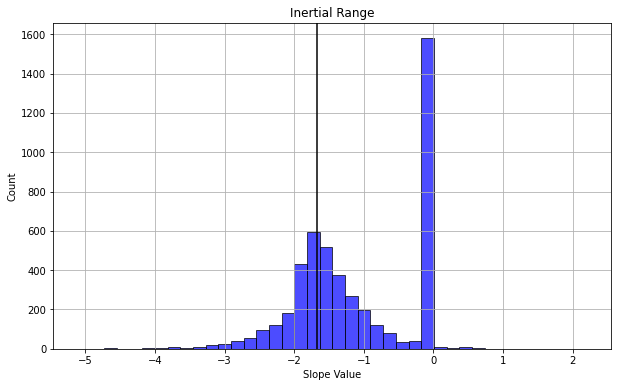

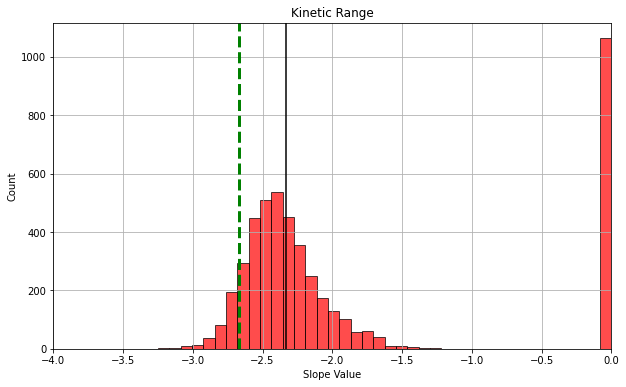

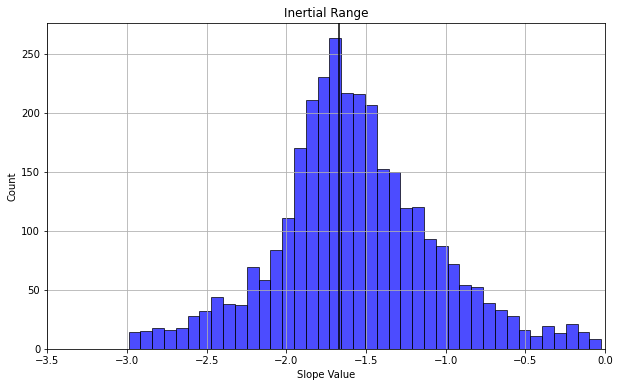

[-2.5967235684714685, -2.0055079674397134, 0.0, 0.0, 0.0, 0.0, 0.0, -0.23563826698658935, 0.0, 0.0, 0.0, 0.0, -2.0294307943188232, 0.0, 0.0, -3.87971821342566, -1.2177968072079657, 0.0, -1.3901452730387502, 0.0, 0.0, -1.6398016361165089, -1.9757832048863417, 0.0, 0.0, -2.13071046498034, -1.2099107772828908, -2.3640060496948063, -1.8842898303516242, -2.4710635862223325, -3.0899003473554316, 0.0, -2.830604499365129, -2.4711893467626416, -2.444236742710379, -1.1546623790923316, -1.6891729287040451, 0.0, 0.0, -2.8474891295292575, -1.6582061217413042, -0.8036796974259721, 0.0, 0.0, -3.3693741622908586, -1.7738819509496113, -1.429612813487183, -1.4494785368160115, -1.5467753622526361, -1.3559313275126592, -3.4301344797218287, -1.3350796696423095, -2.6477802707498896, -1.3893152391608234, -1.5177565469501497, -2.2654947046269434, -1.6697374180658733, -1.4739449444209762, -1.3221640979330176, -1.7086455737751653, -1.458345508141582, -1.3225465218169992, -1.2018601547349135, -1.1530305087888508

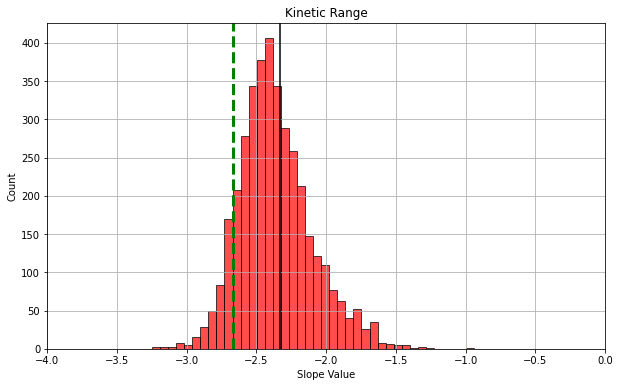

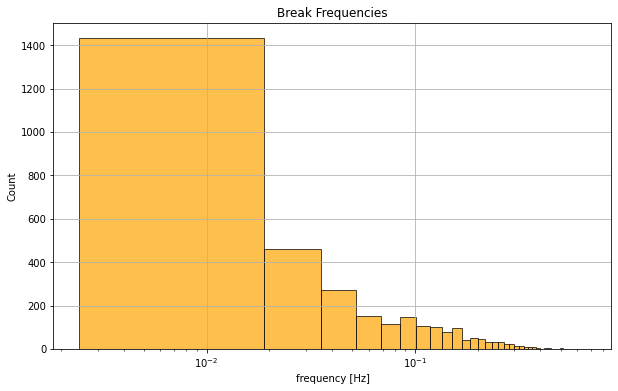

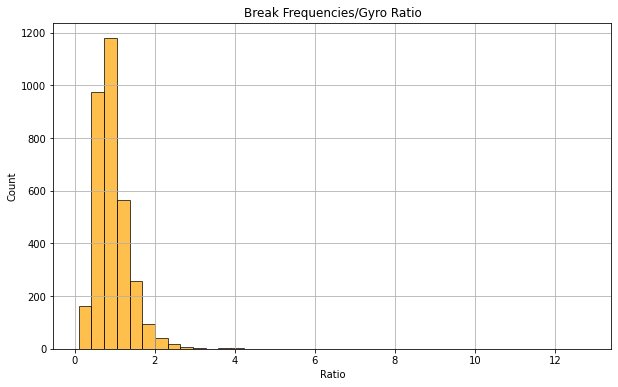

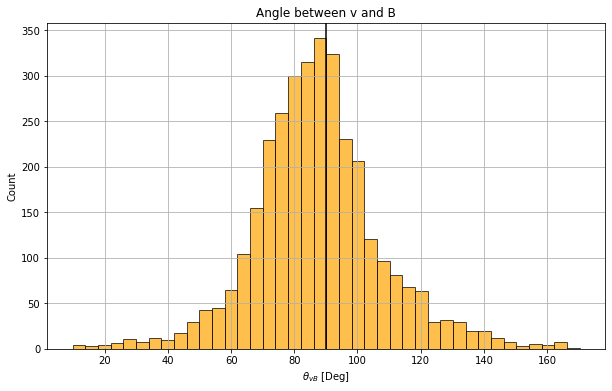

In [75]:
save=False
number_of_bins = 40
end = 'current'


plt.figure(figsize=(10, 6))
plt.hist(combined_mhd_slopes, bins=number_of_bins, alpha=0.7, color='blue', edgecolor='black')
plt.title('Inertial Range')
plt.xlabel('Slope Value')
plt.ylabel('Count')
plt.axvline(x=-5/3, color = 'black')
plt.grid()
#plt.xlim(-3,0)
if save:
    plt.savefig('dirty_mhd_hist_'+str(end)+'jpg', facecolor = 'white')
plt.show()

# Plotting the histogram for right slopes
plt.figure(figsize=(10, 6))
plt.hist(combined_kinetic_slopes, bins=number_of_bins, alpha=0.7, color='red', edgecolor='black')
plt.xlim(-3,0)
plt.title('Kinetic Range')
plt.xlabel('Slope Value')
plt.ylabel('Count')
plt.axvline(x=-7/3, color = 'black')
plt.axvline(x=-8/3, color = 'green', linewidth = 3, linestyle = '--')

plt.grid()
plt.xlim(-4,0)
if save:
    plt.savefig('dirty_kinetic_hist_'+str(end)+'jpg', facecolor = 'white')


filtered_mhd = [num for num in combined_mhd_slopes if num != 0 and num != 10 and num < 0 and num > -3]
filtered_kinetic = [num for num in combined_kinetic_slopes if num != 0 and num < 0 and num > -4]


plt.figure(figsize=(10, 6))
plt.hist(filtered_mhd, bins=number_of_bins, alpha=0.7, color='blue', edgecolor='black')
plt.title('Inertial Range')
plt.xlabel('Slope Value')
plt.ylabel('Count')
plt.axvline(x=-5/3, color = 'black')
plt.grid()
plt.xlim(-3.5,0)
if save:
    plt.savefig('clean_mhd_hist_'+str(end)+'jpg', facecolor = 'white')

plt.show()

# Plotting the histogram for right slopes
plt.figure(figsize=(10, 6))
plt.hist(filtered_kinetic, bins=number_of_bins, alpha=0.7, color='red', edgecolor='black')
#plt.xlim(-4,0)
plt.title('Kinetic Range')
plt.xlabel('Slope Value')
plt.ylabel('Count')
plt.axvline(x=-7/3, color = 'black')
plt.axvline(x=-8/3, color = 'green',linewidth = 3, linestyle = '--')
plt.grid()
plt.xlim(-4,0)
if save:
    plt.savefig('clean_kinetic_hist_'+str(end)+'jpg', facecolor = 'white')

plt.figure(figsize=(10, 6))
plt.hist(combined_breaks_array, bins=number_of_bins, alpha=0.7, color='orange', edgecolor='black')
#plt.xlim(-4,0)
plt.title('Break Frequencies')
plt.xlabel('frequency [Hz]')
plt.ylabel('Count')
#plt.axvline(x=-7/3, color = 'black')
plt.grid()
plt.xscale('log')
if save:
    plt.savefig('breaks_hist_'+str(end)+'jpg', facecolor = 'white')

ratio = [i/j for i,j in  zip(combined_breaks_array, combined_gyros_array)]
plt.figure(figsize=(10, 6))
plt.hist(ratio, bins=number_of_bins, alpha=0.7, color='orange', edgecolor='black')
#plt.xlim(-4,0)
plt.title('Break Frequencies/Gyro Ratio')
plt.xlabel('Ratio')
plt.ylabel('Count')
#plt.axvline(x=-7/3, color = 'black')
plt.grid()
if save:
    plt.savefig('breaks_ratio_hist_'+str(end)+'jpg', facecolor = 'white')
plt.figure(figsize=(10, 6))
plt.hist(combined_thetas_array, bins=number_of_bins, alpha=0.7, color='orange', edgecolor='black')
plt.axvline(x = 90, color = 'black')
#plt.xlim(-4,0)
plt.title('Angle between v and B')
plt.xlabel(r'${\theta_{vB}}$ [Deg]')
plt.ylabel('Count')
#plt.axvline(x=-7/3, color = 'black')
plt.grid()
if save:
    plt.savefig('theta_hist_'+str(end)+'jpg', facecolor = 'white')
print(combined_mhd_slopes)


In [76]:
fits_data = pd.read_csv('/data/juno_spacecraft/data/FWD_FITS/JADE-I_forward_model_ion_v1/JADE-I_forward_model_ion_all_v1.csv', delimiter= ',')
def convert_datetime(datetime_str):
    # Remove the microseconds part
    datetime_str_cleaned = datetime_str.split('.')[0]
    # Convert to pandas datetime object
    date_time = pd.to_datetime(datetime_str_cleaned, format='%Y-%jT%H:%M:%S')
    # Format to the desired output
    return pd.to_datetime(date_time.strftime('%Y-%m-%dT%H:%M:%S'))

fits_data['DATETIME'] = fits_data['                "UTC"'].apply(convert_datetime)
fits_data = fits_data.drop(columns='                "UTC"')

fits_data = fits_data.set_index('DATETIME', drop=True)




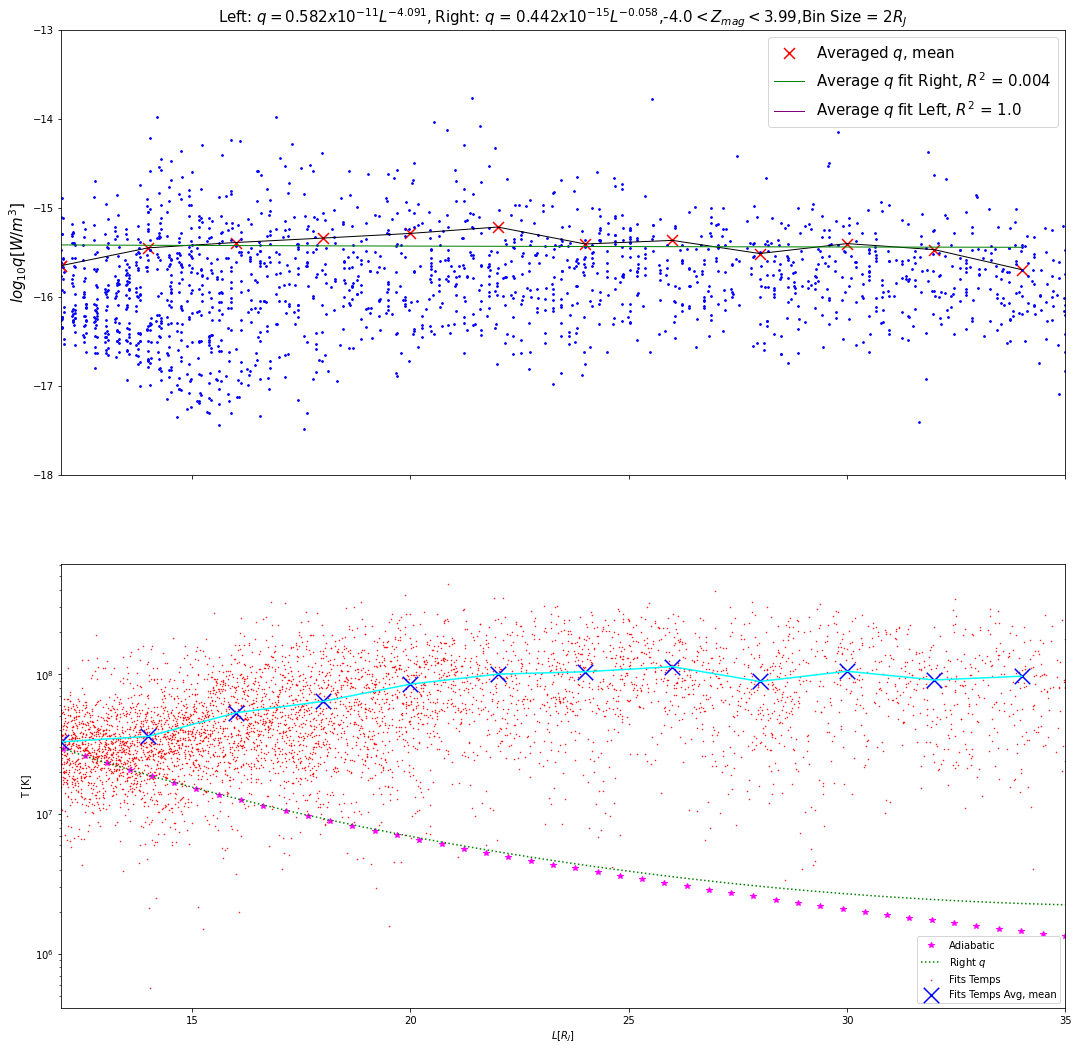

In [78]:
z_limits = [4]
bin_sizes = [2]
binsize_plot = [2]
#sorted_q_dfs_desc_R = sorted_q_dfs_desc_R.iloc[np.where(np.abs(sorted_q_dfs_desc_R['mean_Z']) < .5 )].dropna()
end = 'fits_6_to_30_4min_12_nofilter_point4thresh_thetas_newmeans_keepcone'
save = False
for z_lim in z_limits:
    sorted_q_dfs_desc_R = sorted_q_dfs_desc_R.iloc[np.where(np.abs(sorted_q_dfs_desc_R['mean_Z']) < z_lim )].dropna()
    def _t_eq_2(L, L0, T0, n_0, gamma, v_0, alpha, q_0, s):
        T = []
        T_adiabatic = []
        L_max = np.max(L)
        L_values = np.linspace(L0, L_max, len(L)) 
        k_b = 1.38e-23
        sigma = 2*gamma/3
        R_j = 7.14e7
        omega = (2/3)*(q_0*R_j/(k_b*n_0*v_0))
        lam = s-gamma-alpha
        for L in L_values:

            integration = (omega/(L0**(-sigma)))*(L/L0)**(sigma)*((L**(lam-sigma+1)/(lam-sigma+1)) - (L0**(lam-sigma+1)/(lam-sigma+1))) 
            
            L_over_L0 = L/L0
            T_value = T0*L_over_L0**(sigma) + integration
            T_value_adiabatic = T0*L_over_L0**(sigma) #+ c1 * L_over_L0**(-2*beta/3)*integration[0]
            T.append(T_value)
            T_adiabatic.append(T_value_adiabatic)
        return T, T_adiabatic
    def _temp_dist(RRR):    
        a1 = -0.116
        a2= 2.14
        a3= -2.05
        a4= 0.491
        a5= 0.126
        amu=22
        rrr=np.log10(RRR/6)
        h=a1+a2*rrr+a3*rrr**2.+a4*rrr**3.+a5*rrr**4.

        H=10.**h

        T=amu*(H/0.64)**2.

        T_kelvin = T*11606
        return T_kelvin


    def extract_base_exponent_scientific(number):
        # Calculate exponent with respect to base 10
        exponent = int(np.log10(number))
        base = number / (10 ** exponent)
        return base, exponent


    array_to_be_averaged = sorted_q_dfs_desc_R

    j=0
    for bin_size in bin_sizes:
        R_values = array_to_be_averaged['mean_R']

        q_values_mhd = array_to_be_averaged['q_mhd'].iloc[np.where(array_to_be_averaged['q_mhd'] != 100)]
        q_values_kaw = array_to_be_averaged['q_kaw'].iloc[np.where(array_to_be_averaged['q_kaw'] != 100)]
        q_values_mean = array_to_be_averaged['q_mean_whole_range']
        


        binned_q_array_mhd = []
        binned_q_array_kaw = []
        binned_q_array_mean = []
        binned_temp_array= []
        binned_q_array_mean_plot = []
        binned_temp_array_plot= []

        binned_R_array = [] 
        binned_R_array_plot = []
        binned_q_array_mean_left = []
        
        binned_R_array_left = []


        factor = bin_size
        factor_plot = binsize_plot[j]
        j+=1
        start=6
        right_start=12
        end_L = 35

        Rs = np.arange(right_start,end_L, factor)
        Rs_full = np.arange(start,end_L, factor_plot)
        
        Rs_left = np.arange(start,right_start+2, 2)
        for i in Rs:
            L = i
            average_L = i
            constrained_array_mhd = array_to_be_averaged.iloc[np.where(   (array_to_be_averaged['mean_R'] > (L - factor/2))  &   (array_to_be_averaged['mean_R'] < (L+factor/2)) & (array_to_be_averaged['q_mhd'] != 100))]
            constrained_array_kaw =    array_to_be_averaged.iloc[np.where(   (array_to_be_averaged['mean_R'] > (L-factor/2))  &   (array_to_be_averaged['mean_R'] < (L+factor/2)) & (array_to_be_averaged['q_kaw'] != 100))]
            constrained_array_mean =    array_to_be_averaged.iloc[np.where(   (array_to_be_averaged['mean_R'] > (L-factor/2))  &   (array_to_be_averaged['mean_R'] < (L+factor/2)))]
            constrained_array_temp =  fits_data.iloc[np.where(   (fits_data['  "R"'] > (L-factor/2))  &   (fits_data['  "R"'] < (L+factor/2)))]


            average_value_mhd = np.nanmean(constrained_array_mhd['q_mhd'])
            average_value_kaw = np.nanmean(constrained_array_kaw['q_kaw'])
            average_value_mean = np.nanmean(constrained_array_mean['q_mean_whole_range'])
            average_value_temp = np.nanmean(constrained_array_temp['    "T"'])
            
            
            binned_q_array_mhd.append(average_value_mhd)
            binned_q_array_kaw.append(average_value_kaw)
            binned_q_array_mean.append(average_value_mean)
            binned_temp_array.append(average_value_temp)

            binned_R_array.append(average_L)
            
        for i in Rs_full:
            L = i
            average_L = i    
            constrained_array_mean_plot =    array_to_be_averaged.iloc[np.where(   (array_to_be_averaged['mean_R'] > (L-factor/2))  &   (array_to_be_averaged['mean_R'] < (L+factor/2)))]
            constrained_array_temp_plot =  fits_data.iloc[np.where(   (fits_data['  "R"'] > (L-factor/2))  &   (fits_data['  "R"'] < (L+factor/2)))]

            average_value_mean_plot = np.nanmean(constrained_array_mean_plot['q_mean_whole_range'])
            average_value_temp_plot = np.nanmean(constrained_array_temp_plot['    "T"'])
            
            binned_q_array_mean_plot.append(average_value_mean_plot)
            binned_temp_array_plot.append(average_value_temp_plot)
            
            binned_R_array_plot.append(average_L)
            
        for i in Rs_left:
            L = i
            average_L = i    
            constrained_array_mean_left =    array_to_be_averaged.iloc[np.where(   (array_to_be_averaged['mean_R'] > (L-factor/2))  &   (array_to_be_averaged['mean_R'] < (L+factor/2)))]
            constrained_array_temp_left =  fits_data.iloc[np.where(   (fits_data['  "R"'] > (L-factor/2))  &   (fits_data['  "R"'] < (L+factor/2)))]

            average_value_mean_left = np.nanmean(constrained_array_mean_left['q_mean_whole_range'])
            average_value_temp_left = np.nanmean(constrained_array_temp_left['    "T"'])
            
            binned_q_array_mean_left.append(average_value_mean_left)
            
            binned_R_array_left.append(average_L)


        both_averages = [binned_R_array,binned_q_array_mhd,binned_q_array_kaw,binned_q_array_mean, binned_temp_array]
        both_averages_plot = [binned_R_array_plot, binned_q_array_mean_plot, binned_temp_array_plot]
        both_averages_left = [binned_R_array_left, binned_q_array_mean_left]
        
        df2 = np.asarray(both_averages)
        df_combined = np.asarray(both_averages)
        df3 = np.asarray(both_averages_plot)
        df4 = np.asarray(both_averages_left)
        #df2 = df2[~df2.index.duplicated(keep='first')]

        #mhd_nan = df_combined[df_combined['q_mhd'] > 0].index.dropna()
        #kaw_nan = df_combined[df_combined['q_kaw'] > 0].index.dropna()



        #X_mhd = np.log10(df2[['mean_R']].loc[(mhd_nan)].dropna())
        #X_kaw = np.log10(df2[['mean_R']].loc[kaw_nan].dropna())
        #X_mean = np.log10(df2[['mean_R']])



        #X_mhd = np.log10(df2[0][np.where((df_combined[0] > 0) & (df_combined[1] >0))].reshape(-1,1))
        #X_kaw = np.log10(df2[0][np.where((df_combined[0] > 0) & (df_combined[2] >0)) ].reshape(-1,1))
        X_mean = np.log10(df2[0][np.where((df_combined[0] > 0) & (df_combined[3] >0)) ].reshape(-1,1))
        X_mean_plot = np.log10(df3[0][np.where((df3[0] > 0) & (df3[1] >0)) ].reshape(-1,1))
        X_mean_left = np.log10(df4[0][np.where((df4[0] > 0) & (df4[1] >0)) ].reshape(-1,1))

        #X_mean = np.log10(df2[0])

        #X_mhd_all = np.log10(np.asarray(sorted_q_dfs_desc_R['mean_R'].iloc[np.where((sorted_q_dfs_desc_R['mean_R'] < 10**X_mhd.max() ) & (sorted_q_dfs_desc_R['mean_R'] > 10**X_mhd.min()) & (sorted_q_dfs_desc_R['q_mhd'] !=100))].dropna()).reshape(-1,1))
        #X_kaw_all = np.log10(np.asarray(sorted_q_dfs_desc_R['mean_R'].iloc[np.where((sorted_q_dfs_desc_R['mean_R'] < 10**X_kaw.max() ) & (sorted_q_dfs_desc_R['mean_R'] > 10**X_kaw.min()) & (sorted_q_dfs_desc_R['q_kaw'] !=100))].dropna()).reshape(-1,1))
        X_mean_all = np.log10(np.asarray(sorted_q_dfs_desc_R['mean_R'].iloc[np.where((sorted_q_dfs_desc_R['mean_R'] < 40 ) & (sorted_q_dfs_desc_R['mean_R'] > 10))].dropna()).reshape(-1,1))

        #X_mhd = df2['q_mhd'].dropna().index
        #X_kaw = df2['q_kaw'].dropna().index



        #Y_mhd = np.log10(df_combined[1][np.where((df_combined[0] > 0) & (df_combined[1] >0)) ].reshape(-1,1))
        Y_mean = np.log10(df_combined[3][np.where((df_combined[0] > 0) & (df_combined[3] >0)) ].reshape(-1,1))
        Y_mean_plot = np.log10(df3[1][np.where((df3[0] > 0) & (df3[1] >0)) ].reshape(-1,1))
        Y_mean_left = np.log10(df4[1][np.where((df4[0] > 0) & (df4[1] >0)) ].reshape(-1,1))
        
        
        
        

        #Y_mhd_all = np.log10(np.asarray(sorted_q_dfs_desc_R['q_mhd'].iloc[np.where((sorted_q_dfs_desc_R['mean_R'] < 10**X_mhd.max() ) & (sorted_q_dfs_desc_R['mean_R'] > 10**X_mhd.min()) & (sorted_q_dfs_desc_R['q_mhd'] !=100))].dropna()).reshape(-1,1))
        #Y_kaw_all = np.log10(np.asarray(sorted_q_dfs_desc_R['q_kaw'].iloc[np.where((sorted_q_dfs_desc_R['mean_R'] < 10**X_kaw.max() ) & (sorted_q_dfs_desc_R['mean_R'] > 10**X_kaw.min()) & (sorted_q_dfs_desc_R['q_kaw'] !=100))].dropna()).reshape(-1,1))
        Y_mean_all = np.log10(np.asarray(sorted_q_dfs_desc_R['q'].iloc[np.where((sorted_q_dfs_desc_R['mean_R'] < 40 ) & (sorted_q_dfs_desc_R['mean_R'] > 10))].dropna()).reshape(-1,1))

        Y_kaw = np.log10(df_combined[2][np.where((df_combined[0] > 0) & (df_combined[2] >0)) ].reshape(-1,1))
        #Y_mean = np.log10(df_combined[(df_combined['q'] > 0)]['q'])





        model_mhd = LinearRegression()
        #model_mhd.fit(X_mhd,Y_mhd)

        model_mhd_all = LinearRegression()
        #model_mhd_all.fit(X_mhd_all,Y_mhd_all)

        model_kaw = LinearRegression()
        #model_kaw.fit(X_kaw,Y_kaw)

        model_kaw_all = LinearRegression()
        #model_kaw_all.fit(X_kaw_all,Y_kaw_all)
        
        model_mean = LinearRegression()
        model_mean.fit(X_mean,Y_mean)

        model_mean_all = LinearRegression()
        model_mean_all.fit(X_mean_all,Y_mean_all)
        
        model_mean_left = LinearRegression()
        model_mean_left.fit(X_mean_left,Y_mean_left)


        #mhd_intercept = 10**model_mhd.intercept_
        #mhd_slope = model_mhd.coef_[0]

        #mhd_intercept_all = 10**model_mhd_all.intercept_
        #mhd_slope_all = model_mhd_all.coef_[0]


        #kaw_intercept = 10**model_kaw.intercept_
        #kaw_slope = model_kaw.coef_[0]
        
        #kaw_intercept_all = 10**model_kaw_all.intercept_
        #kaw_slope_all = model_kaw_all.coef_[0]
        
        mean_intercept = 10**model_mean.intercept_
        mean_slope = model_mean.coef_[0]
        
        mean_intercept_all = 10**model_mean_all.intercept_
        mean_slope_all = model_mean_all.coef_[0]

        mean_intercept_left = 10**model_mean_left.intercept_
        mean_slope_left = model_mean_left.coef_[0]

        #mean_intercept = 10**model_mean.intercept_
        #mean_slope = model_mean.coef_[0]

        #y_pred_mhd = model_mhd.predict(X_mhd)

        #y_pred_mhd_all = model_mhd_all.predict(X_mhd_all)
        #y_pred_kaw = model_kaw.predict(X_kaw)
        #y_pred_kaw_all = model_kaw_all.predict(X_kaw_all)
        
        y_pred_mean = model_mean.predict(X_mean)
        y_pred_mean_all = model_mean_all.predict(X_mean_all)
        y_pred_mean_left = model_mean_left.predict(X_mean_left)
        
        
    
        r2_q_all = r2_score(Y_mean,y_pred_mean)
        
        r2_q_all_left = r2_score(Y_mean_left,y_pred_mean_left)

        
        



        #mhd_base, mhd_exponent = extract_base_exponent_scientific(mhd_intercept)


        #mhd_base_all, mhd_exponent_all = extract_base_exponent_scientific(mhd_intercept_all)
        #kaw_base, kaw_exponent = extract_base_exponent_scientific(kaw_intercept)
        mean_base, mean_exponent = extract_base_exponent_scientific(mean_intercept)
        
        mean_base_left, mean_exponent_left = extract_base_exponent_scientific(mean_intercept_left)
        #mean_base, mean_exponent = extract_base_exponent_scientific(mean_intercept)
        #mhd_base_value = mhd_base[0]
        #mhd_slope_value = mhd_slope[0]
        
        #kaw_base_value = kaw_base[0]
        #kaw_slope_value = kaw_slope[0]
        
        mean_base_value = mean_base[0]
        mean_slope_value = mean_slope[0]
        
        mean_base_value_left = mean_base_left[0]
        mean_slope_value_left = mean_slope_left[0]


        #mhd_all_base_value = mhd_base_all[0]
        #mhd_all_slope_value = mhd_slope_all[0]


        fig,ax = plt.subplots(2, figsize=(18, 18), sharex='all')

        # Scatter plot of the data points
        size=3
        #ax[0].scatter(10**X_mhd, Y_mhd,s=30*size, color='red', marker='*', label = r'Averaged $q_{MHD}$')
        #ax[0].scatter(10**X_kaw, Y_kaw,s=30*size, color='cyan', marker='d', label = r'Averaged $q_{KAW}$')
        ax[0].scatter(10**X_mean, Y_mean,s=40*size, color='red', marker='x', label = r'Averaged $q$, mean')
        ax[0].scatter(10**X_mean_left, Y_mean_left,s=40*size, color='red', marker='x')


        #ax[0].plot(10**X_mhd, Y_mhd, color='red', label = r'Averaged $q_{MHD}$')
        #ax[0].plot(10**X_kaw, Y_kaw, color='cyan', label = r'Averaged $q_{KAW}$')

        #plt.scatter(10**X_kaw, Y_kaw, s=size, color='black')
        #plt.scatter(10**X_mean, Y_mean, s=size, color='orange')
        # Plot the regression line
        #ax[0].plot(10**X_mhd, y_pred_mhd, color='orange', linewidth=1, label=r'Average $q_{MHD}$ fit')
        #ax[0].plot(10**X_kaw, y_pred_kaw, color='blue', linewidth=1, label=r'Average $q_{KAW}$ fit')
        ax[0].plot(10**X_mean_plot, Y_mean_plot, color='black', linewidth=1)
        ax[0].plot(10**X_mean, y_pred_mean, color='green', linewidth=1, label=r'Average $q$ fit Right, $R^2$ = ' + str(round(r2_q_all, 3)))
        ax[0].plot(10**X_mean_left, y_pred_mean_left, color='purple', linewidth=1, label=r'Average $q$ fit Left, $R^2$ = ' + str(round(r2_q_all_left, 3)))


        ##ax[0].plot(10**X_mhd_all, y_pred_mhd_all, color='orange', linewidth=1, label=r'B')
        #ax[0].scatter(sorted_q_dfs_desc_R['mean_R'].iloc[np.where((sorted_q_dfs_desc_R['mean_R'] < 10**X_mhd.max() ) & (sorted_q_dfs_desc_R['mean_R'] > 10**X_mhd.min()) &(sorted_q_dfs_desc_R['q_mhd'] !=100))], np.log10(sorted_q_dfs_desc_R['q_mhd'].iloc[np.where((sorted_q_dfs_desc_R['mean_R'] < 10**X_mhd.max() ) & (sorted_q_dfs_desc_R['mean_R'] > 10**X_mhd.min()) & (sorted_q_dfs_desc_R['q_mhd'] !=100))]),s=size, color='green')
        #ax[0].scatter(sorted_q_dfs_desc_R['mean_R'].iloc[np.where((sorted_q_dfs_desc_R['mean_R'] < 10**X_kaw.max() ) & (sorted_q_dfs_desc_R['mean_R'] > 10**X_kaw.min()) & (sorted_q_dfs_desc_R['q_kaw'] !=100))], np.log10(sorted_q_dfs_desc_R['q_kaw'].iloc[np.where((sorted_q_dfs_desc_R['mean_R'] < 10**X_kaw.max() ) & (sorted_q_dfs_desc_R['mean_R'] > 10**X_kaw.min()) & (sorted_q_dfs_desc_R['q_kaw'] !=100))]),s=size, color='purple')
        ax[0].scatter(sorted_q_dfs_desc_R['mean_R'].iloc[np.where((sorted_q_dfs_desc_R['mean_R'] < 10**X_mean_all.max() ) & (sorted_q_dfs_desc_R['mean_R'] > 10**X_mean_all.min()))], np.log10(sorted_q_dfs_desc_R['q_mean_whole_range'].iloc[np.where((sorted_q_dfs_desc_R['mean_R'] < 10**X_mean_all.max() ) & (sorted_q_dfs_desc_R['mean_R'] > 10**X_mean_all.min()))]),s=size, color='blue')

        #plt.plot(10**X_kaw, y_pred_kaw, color = 'red', linewidth=1, label=r'$q_{kaw}$')
        #plt.plot(10**X_mean, y_pred_mean, color = 'purple', linewidth=1, label=r'$q_{mean}$')
        # Adding titles and labels
        #plt.ylim(1e-20, 1e-18)
        #ax[0].set_title(r'$q_{MHD}$ = ' + str(round(mhd_base_value, 3))+ r"$ x 10^{"+ str(round(mhd_exponent,3))+r'}$'+  r'$L^{'+str(round(mhd_slope_value,3))+ r'}$' + r',     $q_{KAW}$ = ' + str(round(kaw_base_value, 3))+ r"$ x 10^{"+ str(round(kaw_exponent,3))+r'}$'+  r'$L^{'+str(round(kaw_slope_value,3))+ r'}$,' + r'$q$ = ' + str(round(mean_base_value, 3))+ r"$ x 10^{"+ str(round(mean_exponent,3))+r'}$'+  r'$L^{'+str(round(mean_slope_value,3))+ r'}$,' + str(round(sorted_q_dfs_desc_R['mean_Z'].min(), 2)) + r'$ < Z_{mag} < $' + str(round(sorted_q_dfs_desc_R['mean_Z'].max(), 2))+ r',Bin Size = ' +str(factor) +r'$R_J$', fontsize = 15)
        ax[0].set_title(r'Left: $q = $' + str(round(mean_base_value_left, 3))+ r"$ x 10^{"+ str(round(mean_exponent_left,3))+r'}$'+  r'$L^{'+str(round(mean_slope_value_left,3))+ r'}, $Right: $q$ = ' + str(round(mean_base_value, 3))+ r"$ x 10^{"+ str(round(mean_exponent,3))+r'}$'+  r'$L^{'+str(round(mean_slope_value,3))+ r'}$,' + str(round(sorted_q_dfs_desc_R['mean_Z'].min(), 2)) + r'$ < Z_{mag} < $' + str(round(sorted_q_dfs_desc_R['mean_Z'].max(), 2))+ r',Bin Size = ' +str(factor) +r'$R_J$', fontsize = 15)

        #plt.title('q_mhd = ' + str(round(mhd_base, 3))+ r"$ x 10^{"+ str(round(mhd_exponent,3))+r'}$'+r'$10^{{'+str(round(mhd_slope,3))+r'}R}$'+' and q_kaw = ' +str(round(kaw_base, 3))+r'$ x 10^{'+str(kaw_exponent)+r'}$'+r'$10^{{'+str(round(kaw_slope, 3))+r'}R}$')
        #plt.title(r'$q_{mhd} = 10^{(' +str(round(mhd_slope,3))+ r'R'+str(round(model_mhd.intercept_,3))+ r')}$' + r', $q_{kaw} = 10^{(' +str(round(kaw_slope,3))+ r'R'+str(round(model_kaw.intercept_,3))+ r')}$', fontsize = 20)
        #ax[0].set_xlabel(r'$L [R_J]$', fontsize=15)

        ax[0].set_ylabel(r'$log_{10}q [W/m^3]$', fontsize = 15)
        ax[0].legend(fontsize=15)
        
        ax[0].set_ylim(-18,-13)



        # Show the plot
    # if save:
        #    plt.savefig('qs_'+str(end)+'.jpg', facecolor = 'white')
    

        #alpha = 1
        beta = 6.6
        T0 = 5e7
        L0 = 10
        number_of_R = 50



        #q_0_mhd = round(mhd_base_value, 3)*10**round(mhd_exponent,3)
        #s_mhd = round(mhd_slope_value,3)

        #q_0_mhd_all = round(mhd_all_base_value, 3)*10**round(mhd_exponent_all,3)
        #s_mhd_all = round(mhd_all_slope_value,3)
        
        #q_0_kaw = round(kaw_base_value, 3)*10**round(kaw_exponent,3)
        #s_kaw = round(kaw_slope_value,3)
        
        q_0_mean = round(mean_base_value, 3)*10**round(mean_exponent,3)
        s_mean = round(mean_slope_value,3)
        
        #q_0_mean = 1.2e-14
        #s_mean = -0.57



        L = np.linspace(L0,end_L,number_of_R)
        #result_mhd_filter = _t_eq(L,L0, T0, alpha, beta, q_0_mhd_filter,s_mhd_filter)
        #result_mhd_no_filter_2 = _t_eq(L,L0, T0, alpha, beta, q_0_mhd,s_mhd)
        #result_mhd_all_no_filter_2 = _t_eq(L,L0, T0, alpha, beta, q_0_mhd_all,s_mhd_all)
        #result_kaw_filter =_t_eq(L,L0, T0, alpha, beta, q_0_kaw_filter,s_kaw_filter)
        #result_kaw_no_filter_2 =_t_eq(L,L0, T0, alpha, beta, q_0_kaw,s_kaw)
        n_0 = (5.906*10**5)*10**6
        gamma = -4.34
        v_0 = (.625*10**-2)*10**3
        alpha = 2.635
        q_0 = q_0_mean
        s = s_mean
        

        
        result_mean_no_filter_2 =_t_eq_2(L,L0, T0, n_0, gamma, v_0, alpha, q_0, s)

        empirical = _temp_dist(L)
        error =0.5 * empirical


        #fig, ax = plt.subplots(figsize = (12, 9))
        ax[1].plot(L, result_mean_no_filter_2[1], c = 'magenta', linestyle = '',marker = '*', label = 'Adiabatic')
        #plt.plot(L, result_mhd_filter[0], c = 'cyan', label = r'$q_{mhd}$ Filtered')
        #plt.plot(L, result_kaw_filter[0], color = 'orange', label = r'$q_{kaw}$ Filtered')
        #plt.plot(L, result_mhd_no_filter[0], c = 'blue', label = r'$q_{mhd}$ v1', ls = ':')
        #plt.plot(L, result_kaw_no_filter[0], color = 'red', label = r'$q_{kaw}$ v1',ls = ':')
        #ax[1].plot(L, result_mhd_no_filter_2[0], c = 'orange', label = r'$q_{MHD}$', ls = ':')
        #plt.plot(L, result_mhd_all_no_filter_2[0], c = 'orange', label = r'B', ls = ':')
        #ax[1].plot(L, result_kaw_no_filter_2[0], color = 'blue', label = r'$q_{KAW}$',ls = ':')
        ax[1].plot(L, result_mean_no_filter_2[0], color = 'green', label = r'Right $q$',ls = ':')
        ax[1].scatter(fits_data['  "R"'][::10], fits_data['    "T"'][::10]*11606, color = 'red', label = 'Fits Temps', s=.25) 
        ax[1].scatter(df3[0], df3[2]*11606, color = 'blue', label = 'Fits Temps Avg, mean', s=80*size, marker = 'x') 
        ax[1].plot(df3[0], df3[2]*11606, color = 'cyan') 

        #ax[1].errorbar(L, empirical,yerr = error, linestyle = '--', color = 'black', label = 'Bag. & Del. 2011')
        ax[1].set_yscale('log')
        #ax[1].set_ylim(10**6, 10**9)
        ax[1].set_xlim(L.min(),L.max())
        ax[1].set_xlabel(r'$L [R_J]$')
        ax[1].set_ylabel(r'T [K]')
        ax[1].legend()
        
        ax[1].set_xlim(12,35)
        #ax[1].set_title(r'A: $q_{mhd}$ = ' + str(round(mhd_base_value, 3))+ r"$ x 10^{"+ str(round(mhd_exponent,3))+r'}$'+  r'$L^{'+str(round(mhd_slope_value,3))+ r'}$' + r', B: $q_{mhd}$ = ' + str(round(mhd_all_base_value, 3))+ r"$ x 10^{"+ str(round(mhd_exponent_all,3))+r'}$'+  r'$L^{'+str(round(mhd_all_slope_value,3))+ r'}$, ' + str(round(sorted_q_dfs_desc_R['mean_Z'].min(), 2)) + r'$ < Z_{mag} < $' + str(round(sorted_q_dfs_desc_R['mean_Z'].max(), 2))+ r', Bin Size = ' +str(factor) +r'$R_J$', fontsize = 15)

        #plt.title('Temp. Comparisons from Equation 4 in Ng 2018 (v1 vs. v2)')
        save = False
        if save:
            plt.savefig('/home/mtfranciscovich/Juno-codes/q_and_temp_plots_zlimits_fits/mean_test_q_and_temp_binsize' + str(bin_size)+'_'+str(end)+'zlim_' +str(z_lim)+'.jpg', facecolor = 'white')
        plt.show()


In [7]:
print(len(mhd_slopes))

49
